In [1]:
import fastf1 as ff1
from fastf1 import plotting
plotting.setup_mpl()
ff1.Cache.enable_cache('cache/')
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
pio.templates.default = "plotly_dark"
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
year = 2022
gp_round = 7
ses = 'FP3'
driver_1 = 'LEC'
driver_2 = 'GAS'

In [3]:
events_list = ff1.get_event_schedule(2022)[2:]

session = ff1.get_session(year, gp_round, ses)
session.load(weather=True, telemetry=True)

core           INFO 	Loading data for Monaco Grand Prix - Practice 3 [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for car_data
api            INFO 	Using cached data for position_data
api            INFO 	Using cached data for weather_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '55', '47', '44', '31', '24', '23', '22', '20', '18', '16', '14', '11', '10', '6', '5', '4', '3', '63', '77']


In [4]:
events_list

,RoundNumber,Country,Location,OfficialEventName,EventDate,EventName,EventFormat,Session1,Session1Date,Session2,Session2Date,Session3,Session3Date,Session4,Session4Date,Session5,Session5Date,F1ApiSupport
2,1,Bahrain,Sakhir,FORMULA 1 GULF AIR BAHRAIN GRAND PRIX 2022,2022-03-20 20:00:00,Bahrain Grand Prix,conventional,Practice 1,2022-03-18 15:00:00,Practice 2,2022-03-18 18:00:00,Practice 3,2022-03-19 15:00:00,Qualifying,2022-03-19 18:00:00,Race,2022-03-20 18:00:00,True
3,2,Saudi Arabia,Jeddah,FORMULA 1 STC SAUDI ARABIAN GRAND PRIX 2022,2022-03-27 22:00:00,Saudi Arabian Grand Prix,conventional,Practice 1,2022-03-25 17:00:00,Practice 2,2022-03-25 20:00:00,Practice 3,2022-03-26 17:00:00,Qualifying,2022-03-26 20:00:00,Race,2022-03-27 20:00:00,True
4,3,Australia,Melbourne,FORMULA 1 HEINEKEN AUSTRALIAN GRAND PRIX 2022,2022-04-10 17:00:00,Australian Grand Prix,conventional,Practice 1,2022-04-08 13:00:00,Practice 2,2022-04-08 16:00:00,Practice 3,2022-04-09 13:00:00,Qualifying,2022-04-09 16:00:00,Race,2022-04-10 15:00:00,True
5,4,Italy,Imola,FORMULA 1 ROLEX GRAN PREMIO DEL MADE IN ITALY ...,2022-04-24 17:00:00,Emilia Romagna Grand Prix,sprint,Practice 1,2022-04-22 13:30:00,Qualifying,2022-04-22 17:00:00,Practice 2,2022-04-23 12:30:00,Sprint,2022-04-23 16:30:00,Race,2022-04-24 15:00:00,True
6,5,United States,Miami,FORMULA 1 CRYPTO.COM MIAMI GRAND PRIX 2022,2022-05-08 17:30:00,Miami Grand Prix,conventional,Practice 1,2022-05-06 14:30:00,Practice 2,2022-05-06 17:30:00,Practice 3,2022-05-07 13:00:00,Qualifying,2022-05-07 16:00:00,Race,2022-05-08 15:30:00,True
7,6,Spain,Barcelona,FORMULA 1 PIRELLI GRAN PREMIO DE ESPAÑA 2022,2022-05-22 17:00:00,Spanish Grand Prix,conventional,Practice 1,2022-05-20 14:00:00,Practice 2,2022-05-20 17:00:00,Practice 3,2022-05-21 13:00:00,Qualifying,2022-05-21 16:00:00,Race,2022-05-22 15:00:00,True
8,7,Monaco,Monte Carlo,FORMULA 1 GRAND PRIX DE MONACO 2022,2022-05-29 17:00:00,Monaco Grand Prix,conventional,Practice 1,2022-05-27 14:00:00,Practice 2,2022-05-27 17:00:00,Practice 3,2022-05-28 13:00:00,Qualifying,2022-05-28 16:00:00,Race,2022-05-29 15:00:00,True
9,8,Azerbaijan,Baku,FORMULA 1 AZERBAIJAN GRAND PRIX 2022,2022-06-12 17:00:00,Azerbaijan Grand Prix,conventional,Practice 1,2022-06-10 15:00:00,Practice 2,2022-06-10 18:00:00,Practice 3,2022-06-11 15:00:00,Qualifying,2022-06-11 18:00:00,Race,2022-06-12 15:00:00,True
10,9,Canada,Montréal,FORMULA 1 GRAND PRIX DU CANADA 2022,2022-06-19 16:00:00,Canadian Grand Prix,conventional,Practice 1,2022-06-17 14:00:00,Practice 2,2022-06-17 17:00:00,Practice 3,2022-06-18 13:00:00,Qualifying,2022-06-18 16:00:00,Race,2022-06-19 14:00:00,True
11,10,Great Britain,Silverstone,FORMULA 1 BRITISH GRAND PRIX 2022,2022-07-03 17:00:00,British Grand Prix,conventional,Practice 1,2022-07-01 13:00:00,Practice 2,2022-07-01 16:00:00,Practice 3,2022-07-02 12:00:00,Qualifying,2022-07-02 15:00:00,Race,2022-07-03 15:00:00,True


In [5]:
session = ff1.get_session(2022, 4, 'R')
session.load(weather=False, telemetry=False)
session.results

core           INFO 	Loading data for Emilia Romagna Grand Prix - Race [v2.2.8]
api            INFO 	Using cached data for driver_info
api            INFO 	Using cached data for timing_data
api            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
api            INFO 	Using cached data for session_status_data
api            INFO 	Using cached data for track_status_data
api            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['1', '11', '4', '63', '77', '16', '22', '5', '20', '18', '23', '10', '44', '31', '24', '6', '47', '3', '14', '55']


,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,2.0,NaT,NaT,NaT,0 days 01:33:04.058000,Finished,8.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,7.0,12.0,NaT,NaT,NaT,0 days 01:33:09.096000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,13.0,NaT,NaT,NaT,0 days 01:33:18.878000,Finished,4.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,9.0,8.0,NaT,NaT,NaT,0 days 01:33:23.246000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,NaT,+1 Lap,1.0


In [6]:
session.results

,DriverNumber,BroadcastName,Abbreviation,TeamName,TeamColor,FirstName,LastName,FullName,Position,GridPosition,Q1,Q2,Q3,Time,Status,Points
1,1,M VERSTAPPEN,VER,Red Bull Racing,1e5bc6,Max,Verstappen,Max Verstappen,1.0,1.0,NaT,NaT,NaT,0 days 01:32:07.986000,Finished,26.0
11,11,S PEREZ,PER,Red Bull Racing,1e5bc6,Sergio,Perez,Sergio Perez,2.0,3.0,NaT,NaT,NaT,0 days 01:32:24.513000,Finished,18.0
4,4,L NORRIS,NOR,McLaren,f58020,Lando,Norris,Lando Norris,3.0,5.0,NaT,NaT,NaT,0 days 01:32:42.820000,Finished,15.0
63,63,G RUSSELL,RUS,Mercedes,6cd3bf,George,Russell,George Russell,4.0,11.0,NaT,NaT,NaT,0 days 01:32:50.492000,Finished,12.0
77,77,V BOTTAS,BOT,Alfa Romeo,b12039,Valtteri,Bottas,Valtteri Bottas,5.0,7.0,NaT,NaT,NaT,0 days 01:32:51.167000,Finished,10.0
16,16,C LECLERC,LEC,Ferrari,ed1c24,Charles,Leclerc,Charles Leclerc,6.0,2.0,NaT,NaT,NaT,0 days 01:33:04.058000,Finished,8.0
22,22,Y TSUNODA,TSU,AlphaTauri,4e7c9b,Yuki,Tsunoda,Yuki Tsunoda,7.0,12.0,NaT,NaT,NaT,0 days 01:33:09.096000,Finished,6.0
5,5,S VETTEL,VET,Aston Martin,2d826d,Sebastian,Vettel,Sebastian Vettel,8.0,13.0,NaT,NaT,NaT,0 days 01:33:18.878000,Finished,4.0
20,20,K MAGNUSSEN,MAG,Haas F1 Team,b6babd,Kevin,Magnussen,Kevin Magnussen,9.0,8.0,NaT,NaT,NaT,0 days 01:33:23.246000,Finished,2.0
18,18,L STROLL,STR,Aston Martin,2d826d,Lance,Stroll,Lance Stroll,10.0,15.0,NaT,NaT,NaT,NaT,+1 Lap,1.0


In [7]:
# Returns only laps quicker than 107% of the quickest lap of the session, removing outlaps and inlaps.
session.laps.pick_quicklaps()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
21,0 days 01:38:38.589000,1,0 days 00:01:23.794000,22.0,2.0,NaT,NaT,0 days 00:00:27.070000,0 days 00:00:28.586000,0 days 00:00:28.138000,...,288.0,False,MEDIUM,3.0,True,0 days 01:37:14.795000,Red Bull Racing,VER,1,True
22,0 days 01:40:01.458000,1,0 days 00:01:22.869000,23.0,2.0,NaT,NaT,0 days 00:00:26.878000,0 days 00:00:28.284000,0 days 00:00:27.707000,...,279.0,False,MEDIUM,4.0,True,0 days 01:38:38.589000,Red Bull Racing,VER,1,True
23,0 days 01:41:23.909000,1,0 days 00:01:22.451000,24.0,2.0,NaT,NaT,0 days 00:00:26.411000,0 days 00:00:28.233000,0 days 00:00:27.807000,...,290.0,False,MEDIUM,5.0,True,0 days 01:40:01.458000,Red Bull Racing,VER,1,True
24,0 days 01:42:46.065000,1,0 days 00:01:22.156000,25.0,2.0,NaT,NaT,0 days 00:00:26.276000,0 days 00:00:27.926000,0 days 00:00:27.954000,...,291.0,False,MEDIUM,6.0,True,0 days 01:41:23.909000,Red Bull Racing,VER,2,True
25,0 days 01:44:07.718000,1,0 days 00:01:21.653000,26.0,2.0,NaT,NaT,0 days 00:00:26.236000,0 days 00:00:27.987000,0 days 00:00:27.430000,...,289.0,False,MEDIUM,7.0,True,0 days 01:42:46.065000,Red Bull Racing,VER,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1119,0 days 02:28:21.061000,3,0 days 00:01:21.835000,57.0,4.0,NaT,NaT,0 days 00:00:26.040000,0 days 00:00:28.214000,0 days 00:00:27.581000,...,278.0,False,HARD,27.0,True,0 days 02:26:59.226000,McLaren,RIC,1,True
1120,0 days 02:29:42.670000,3,0 days 00:01:21.609000,58.0,4.0,NaT,NaT,0 days 00:00:25.976000,0 days 00:00:28.201000,0 days 00:00:27.432000,...,279.0,False,HARD,28.0,True,0 days 02:28:21.061000,McLaren,RIC,1,True
1121,0 days 02:31:04.352000,3,0 days 00:01:21.682000,59.0,4.0,NaT,NaT,0 days 00:00:25.939000,0 days 00:00:28.237000,0 days 00:00:27.506000,...,278.0,False,HARD,29.0,True,0 days 02:29:42.670000,McLaren,RIC,1,True
1122,0 days 02:32:26.122000,3,0 days 00:01:21.770000,60.0,4.0,NaT,NaT,0 days 00:00:26.053000,0 days 00:00:28.234000,0 days 00:00:27.483000,...,278.0,False,HARD,30.0,True,0 days 02:31:04.352000,McLaren,RIC,1,True


In [8]:
df = session.laps
df.head()

,Time,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,Sector3Time,...,SpeedST,IsPersonalBest,Compound,TyreLife,FreshTyre,LapStartTime,Team,Driver,TrackStatus,IsAccurate
0,0 days 01:03:54.806000,1,NaT,1.0,1.0,0 days 00:25:08.250000,NaT,NaT,0 days 00:00:31.809000,0 days 00:00:46.739000,...,100.0,False,INTERMEDIATE,1.0,True,0 days 01:02:03.225000,Red Bull Racing,VER,24,False
1,0 days 01:06:20.801000,1,0 days 00:02:25.995000,2.0,1.0,NaT,NaT,0 days 00:00:54.085000,0 days 00:00:47.410000,0 days 00:00:44.500000,...,133.0,False,INTERMEDIATE,2.0,True,0 days 01:03:54.806000,Red Bull Racing,VER,4,False
2,0 days 01:08:37.301000,1,0 days 00:02:16.500000,3.0,1.0,NaT,NaT,0 days 00:00:45.833000,0 days 00:00:46.168000,0 days 00:00:44.499000,...,164.0,False,INTERMEDIATE,3.0,True,0 days 01:06:20.801000,Red Bull Racing,VER,4,False
3,0 days 01:11:04.728000,1,0 days 00:02:27.427000,4.0,1.0,NaT,NaT,0 days 00:00:42.546000,0 days 00:00:48.335000,0 days 00:00:56.546000,...,101.0,False,INTERMEDIATE,4.0,True,0 days 01:08:37.301000,Red Bull Racing,VER,4,False
4,0 days 01:12:36.178000,1,0 days 00:01:31.450000,5.0,1.0,NaT,NaT,0 days 00:00:29.619000,0 days 00:00:30.801000,0 days 00:00:31.030000,...,273.0,False,INTERMEDIATE,5.0,True,0 days 01:11:04.728000,Red Bull Racing,VER,1,False


In [9]:
df = df[["Time", "LapNumber", "Driver"]]
df.head()


,Time,LapNumber,Driver
0,0 days 01:03:54.806000,1.0,VER
1,0 days 01:06:20.801000,2.0,VER
2,0 days 01:08:37.301000,3.0,VER
3,0 days 01:11:04.728000,4.0,VER
4,0 days 01:12:36.178000,5.0,VER


In [10]:
import re
#Convert Time to seconds
def time_to_seconds(string):
    array = re.findall(r'[0-9]+', str(string))
    array = array[1:]
    array[0] = int(array[0]) * 3600
    array[1] = int(array[1]) * 60
    array = float(str(array[0] + array[1] + int(array[2])) + "." + array[3])
    
    return array

df["Time"] = df["Time"].apply(time_to_seconds)
df.head()



,Time,LapNumber,Driver
0,3834.806,1.0,VER
1,3980.801,2.0,VER
2,4117.301,3.0,VER
3,4264.728,4.0,VER
4,4356.178,5.0,VER


In [11]:
# fig_bar = px.histogram(df, x="Driver", y="Time2", color="Driver",
#                  animation_frame="LapNumber", animation_group="Driver", 
#                  range_y=[0,30000],
#                  color_discrete_sequence=px.colors.qualitative.T10)
# fig_bar.update_yaxes(showgrid=False),
# fig_bar.update_xaxes(categoryorder='total ascending')
# fig_bar.update_traces(hovertemplate=None)
# fig_bar.update_layout(margin=dict(t=70, b=0, l=70, r=40),
#                         hovermode="x unified",
#                         xaxis_tickangle=360,
#                         xaxis_title=' ', yaxis_title=" ",
#                         plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
#                         title_font=dict(size=25, color='#a5a7ab', family="Lato, sans-serif"),
#                         font=dict(color='#8a8d93'),
#                         legend=dict(orientation="h", yanchor="bottom", y=1.02, xanchor="right", x=1)
#                           )
# fig_bar.show()

In [12]:
df["LapNumber"] = df["LapNumber"].astype(int)
LapNumber = max(df["LapNumber"])

In [13]:
df = df[df["LapNumber"] != 0]

In [14]:
new_df = pd.DataFrame()
for i in range(1, LapNumber):
    df_i = df[df["LapNumber"] == i]
    minimum = min(df_i["Time"])
    df_i["Time_Diff"] = df_i["Time"] - minimum
    #concatenate new dataframe
    new_df = pd.concat([new_df, df_i])

new_df

,Time,LapNumber,Driver,Time_Diff
0,3834.806,1,VER,0.000
63,3835.995,1,PER,1.189
126,3838.123,1,NOR,3.317
189,3843.199,1,RUS,8.393
252,3844.461,1,BOT,9.655
...,...,...,...,...
876,9263.839,62,OCO,92.509
938,9274.864,62,ZHO,103.534
1000,9277.517,62,LAT,106.187
1062,9295.391,62,MSC,124.061


In [15]:
new_df.head()

,Time,LapNumber,Driver,Time_Diff
0,3834.806,1,VER,0.000
63,3835.995,1,PER,1.189
126,3838.123,1,NOR,3.317
189,3843.199,1,RUS,8.393
252,3844.461,1,BOT,9.655


In [16]:
new_df2 = new_df.pivot_table(values='Time_Diff', index=df.LapNumber, columns=df.Driver)
new_df2.head()

Driver,ALB,ALO,BOT,GAS,HAM,LAT,LEC,MAG,MSC,NOR,OCO,PER,RIC,RUS,STR,TSU,VER,VET,ZHO
LapNumber,,,,,,,,,,,,,,,,,,,
1,21.615,11.305,9.655,20.360,18.143,23.088,4.629,6.161,24.268,3.317,19.253,1.189,28.146,8.393,16.370,14.320,0.0,12.802,27.185
2,25.648,11.679,10.599,25.153,21.793,27.854,5.148,6.993,28.580,3.693,22.862,1.196,32.308,9.052,18.743,16.147,0.0,14.360,29.599
3,24.702,14.223,13.019,24.315,21.220,26.934,7.920,9.274,27.535,5.551,22.751,2.506,29.586,11.089,19.970,18.035,0.0,16.593,28.167
4,6.654,3.764,3.304,6.045,5.357,7.269,1.641,2.083,7.534,1.275,5.778,0.509,8.661,2.457,5.201,4.335,0.0,4.149,8.386
5,13.689,11.999,7.640,13.038,12.241,14.285,3.783,5.023,14.793,3.220,12.740,1.768,15.897,6.391,10.831,9.469,0.0,9.029,15.393


In [17]:
from matplotlib.animation import FuncAnimation

In [33]:
db = pd.read_csv('https://raw.githubusercontent.com/pythoninoffice/pythonio_examples/main/matplotlib_bar_chart_race/dragon_ball_pl.csv')

db.head()

,Yamcha,Krilin,Goku,Master Shen,Chiaotzu,Tien Shinhan
0,978,347,446,715,621,723
1,1375,954,1118,1659,656,988
2,1641,1784,1637,2235,1300,1701
3,2472,2160,1737,2778,1651,1889
4,3346,2926,2197,3103,1842,2006


<BarContainer object of 6 artists>

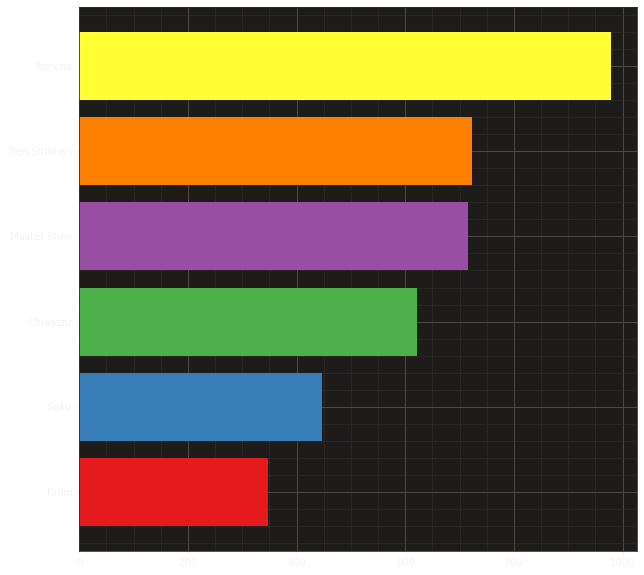

In [34]:
one_row = db.iloc[0]
one_row_ascending = one_row.sort_values()
characters = db.columns

fix, ax = plt.subplots(figsize=(10,10))
ax.barh(y = range(len(characters)), 
        tick_label = one_row_ascending.index,
        width = one_row_ascending.values, 
        align='center',
        color = plt.cm.Set1(range(len(characters))))

In [37]:
one_row

Yamcha          978
Krilin          347
Goku            446
Master Shen     715
Chiaotzu        621
Tien Shinhan    723
Name: 0, dtype: int64

c:\Users\Berenger\anaconda3\envs\new_base\lib\site-packages\matplotlib\ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


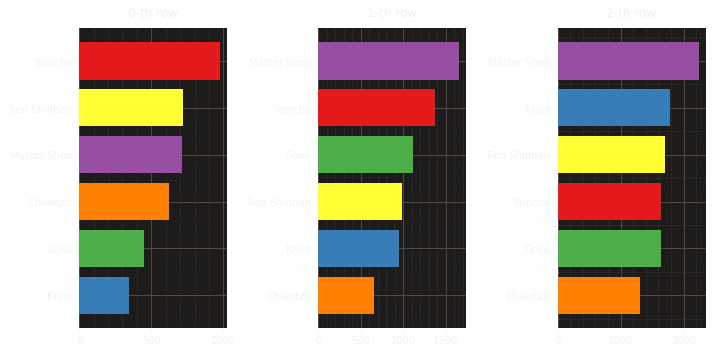

In [38]:
db.head(3)


num = 3
fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
for i, ax in enumerate(axs):
    ax.barh(y=db.iloc[i].rank(),
            tick_label = db.iloc[i].index,
            width = db.iloc[i].values,
            color = plt.cm.Set1(range(6)))
    ax.set_title(f'{i}-th row', fontsize='larger')
    [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

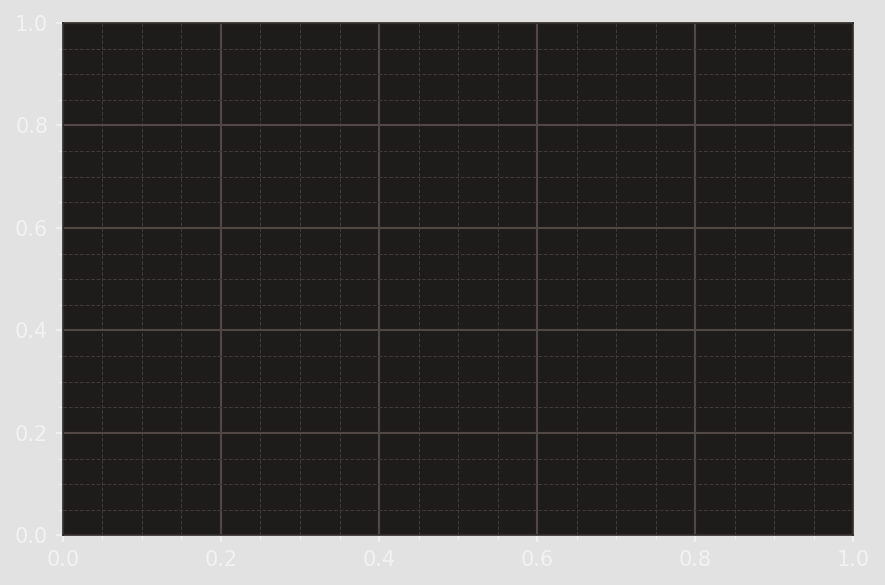

In [39]:
from matplotlib.animation import FuncAnimation

def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Greys(0.2))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = db.iloc[i].rank().values,
           tick_label=db.iloc[i].index,
           width = db.iloc[i].values,
           height = 0.8,
           color = plt.cm.Set1(range(11))
           )
    ax.set_title(f'Frame: {i}')
    #ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Greys(0.2),
                      dpi = 150,
                      tight_layout=True
                     )

data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(db),
    interval=300
)



In [41]:
db.index = range(0,21*10,10)
print(list(db.index))
[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]

row_nums = [i for i in range(0,210) if i % 10 != 0 ]
empty = pd.DataFrame(np.nan, index= row_nums, columns = db.columns)

expand_df = pd.concat([db, empty]).sort_index()

rank_df = expand_df.rank(axis=1)

[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200]


In [42]:
expand_df = expand_df.interpolate()
rank_df = rank_df.interpolate()

c:\Users\Berenger\anaconda3\envs\new_base\lib\site-packages\matplotlib\ticker.py:2789: RuntimeWarning: invalid value encountered in log10
  majorstep_no_exponent = 10 ** (np.log10(majorstep) % 1)


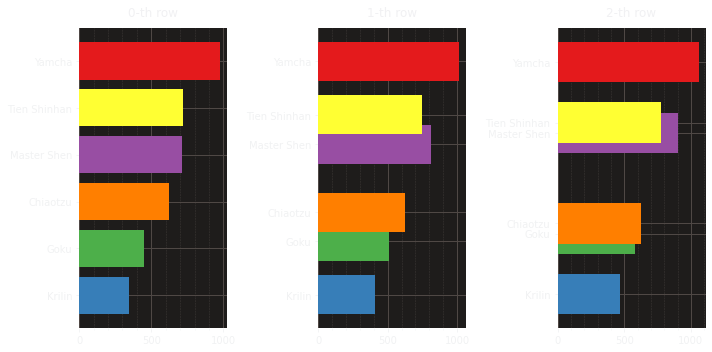

In [43]:
num = 3
fig, axs = plt.subplots(nrows = 1, ncols = num, figsize = (10, 5), tight_layout = True)
for i, ax in enumerate(axs):
    ax.barh(y=rank_df.iloc[i].values,
            tick_label = expand_df.iloc[i].index,
            width = expand_df.iloc[i].values,
            color = plt.cm.Set1(range(6)))
    ax.set_title(f'{i}-th row', fontsize='larger')
    [spine.set_visible(False) for spine in ax.spines.values()]  # remove chart outlines

c:\Users\Berenger\anaconda3\envs\new_base\lib\site-packages\matplotlib\animation.py:887: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you have outputted the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


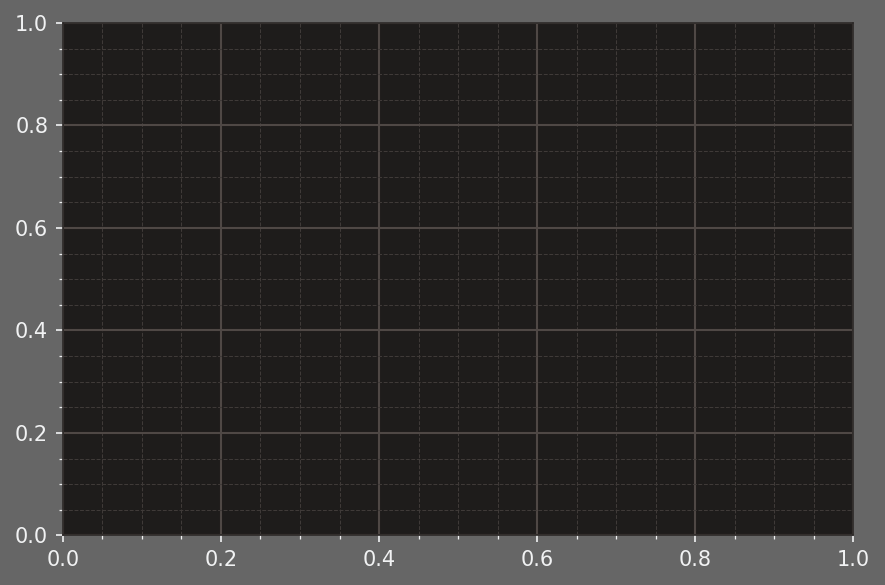

In [53]:
def update(i):
    ax.clear()
    ax.set_facecolor(plt.cm.Dark2(0.9))
    [spine.set_visible(False) for spine in ax.spines.values()]
    hbars = ax.barh(y = rank_df.iloc[i].values,
           tick_label=expand_df.iloc[i].index,
           width = expand_df.iloc[i].values,
           height = 0.8,
           color = plt.cm.Dark2(range(11))
           )
    ax.set_title(f'Frame: {i}')
    ax.bar_label(hbars, fmt='%.2d')
    

fig,ax = plt.subplots(#figsize=(10,7),
                      facecolor = plt.cm.Dark2(0.9),
                      dpi = 150,
                      tight_layout=True
                     )


data_anime = FuncAnimation(
    fig = fig,
    func = update,
    frames= len(expand_df),
    interval=100
)

In [54]:
data_anime.save("test.gif")

animation       INFO 	Animation.save using <class 'matplotlib.animation.FFMpegWriter'>
animation       INFO 	MovieWriter._run: running command: ffmpeg -f rawvideo -vcodec rawvideo -s 900x600 -pix_fmt rgba -r 10.0 -loglevel error -i pipe: -filter_complex 'split [a][b];[a] palettegen [p];[b][p] paletteuse' -y test.gif


In [47]:
plt.show("test.gif")